# __Custering__

    This notebook tests the different performances of clustering algorithms on a simple dataset called Mall_Customers.csv that contains the details of the customers that come to the mall for shopping. The task is to segregate the customers into different groups based on their characteristics.

#### __Importing Libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#### __Loading Datasets__

In [2]:
data = pd.read_csv("./data/Mall_Customers.csv")
data = data.rename(columns = {"Genre":"Gender"})

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### __Dataset Information__

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### __Encoding__

In [4]:
lab_en = preprocessing.LabelEncoder() 
data['Gender']= lab_en.fit_transform(data['Gender'])

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


#### __Feature Scaling__

In [5]:
sc = StandardScaler()

columns = [col for col in data.columns]

features = data[columns]
scaled_data = sc.fit_transform(features)
scaled_df = pd.DataFrame(scaled_data, columns=columns)

data_df = pd.DataFrame(scaled_df.loc[:, "Annual Income (k$)":"Spending Score (1-100)"])

#### __*Heirarchical Clustering*__

In [6]:
agg_c = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
predict = agg_c.fit_predict(data_df)

#### __Using Dendrograms to find optimal number of clusters__

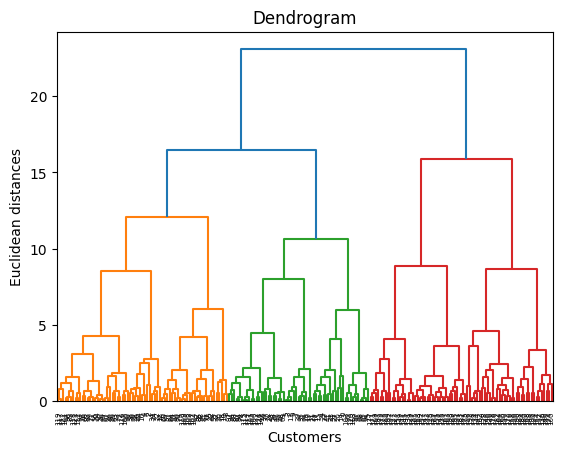

In [7]:
dendrogram = dendrogram(linkage(scaled_df, method = 'ward'), orientation='top', labels=scaled_df.index, distance_sort='descending', show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

#### __Visualising the clusters__

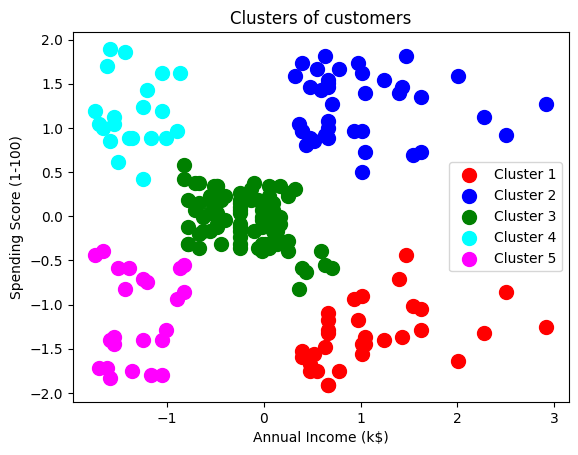

In [8]:
scaled_df['HC_Cluster'] = predict

plt.scatter(scaled_df.loc[scaled_df['HC_Cluster'] == 0, 'Annual Income (k$)'], scaled_df.loc[scaled_df['HC_Cluster'] == 0, 'Spending Score (1-100)'], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_df.loc[scaled_df['HC_Cluster'] == 1, 'Annual Income (k$)'], scaled_df.loc[scaled_df['HC_Cluster'] == 1, 'Spending Score (1-100)'], s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_df.loc[scaled_df['HC_Cluster'] == 2, 'Annual Income (k$)'], scaled_df.loc[scaled_df['HC_Cluster'] == 2, 'Spending Score (1-100)'], s=100, c='green', label='Cluster 3')
plt.scatter(scaled_df.loc[scaled_df['HC_Cluster'] == 3, 'Annual Income (k$)'], scaled_df.loc[scaled_df['HC_Cluster'] == 3, 'Spending Score (1-100)'], s=100, c='cyan', label='Cluster 4')
plt.scatter(scaled_df.loc[scaled_df['HC_Cluster'] == 4, 'Annual Income (k$)'], scaled_df.loc[scaled_df['HC_Cluster'] == 4, 'Spending Score (1-100)'], s=100, c='magenta', label='Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### __*K-Means Clustering*__

In [9]:
k_means = KMeans(n_clusters = 5, n_init = 1, init = 'k-means++', random_state = 6497)
predict = k_means.fit_predict(data_df)

#### __Using Elbow method to find optimal number of clusters__

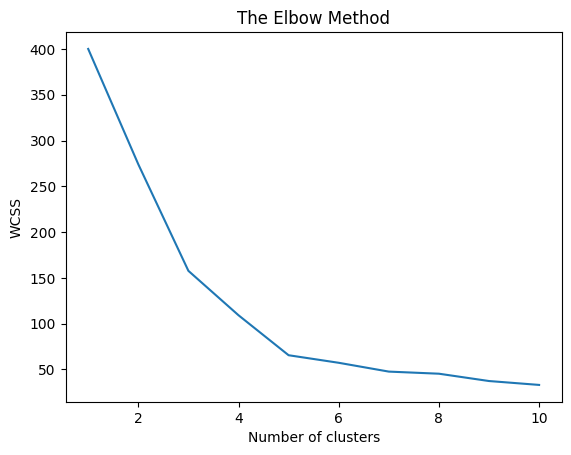

In [10]:
wcss = []

for i in range(1, 11):
    wcss_k_means = KMeans(n_clusters = i, n_init = 1, init = 'k-means++', random_state = 6497)
    wcss_k_means.fit(data_df)
    wcss.append(wcss_k_means.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### __Visualising the clusters__

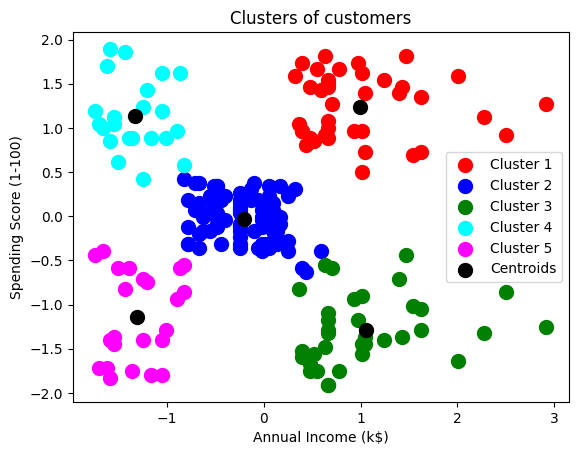

In [11]:
scaled_df['KM_Cluster'] = predict

plt.scatter(scaled_df.loc[scaled_df['KM_Cluster'] == 0, 'Annual Income (k$)'], scaled_df.loc[scaled_df['KM_Cluster'] == 0, 'Spending Score (1-100)'], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_df.loc[scaled_df['KM_Cluster'] == 1, 'Annual Income (k$)'], scaled_df.loc[scaled_df['KM_Cluster'] == 1, 'Spending Score (1-100)'], s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_df.loc[scaled_df['KM_Cluster'] == 2, 'Annual Income (k$)'], scaled_df.loc[scaled_df['KM_Cluster'] == 2, 'Spending Score (1-100)'], s=100, c='green', label='Cluster 3')
plt.scatter(scaled_df.loc[scaled_df['KM_Cluster'] == 3, 'Annual Income (k$)'], scaled_df.loc[scaled_df['KM_Cluster'] == 3, 'Spending Score (1-100)'], s=100, c='cyan', label='Cluster 4')
plt.scatter(scaled_df.loc[scaled_df['KM_Cluster'] == 4, 'Annual Income (k$)'], scaled_df.loc[scaled_df['KM_Cluster'] == 4, 'Spending Score (1-100)'], s=100, c='magenta', label='Cluster 5')

centroids = k_means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
